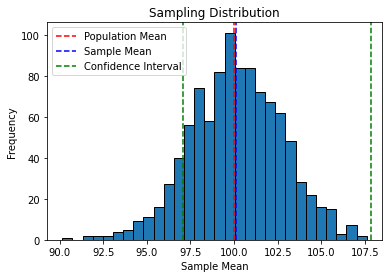

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Population parameters
population_mean = 100
population_std = 15

# Number of samples and sample size
num_samples = 1000
sample_size = 30

# Generate samples from the population
samples = np.random.normal(loc=population_mean, scale=population_std, size=(num_samples, sample_size))

# Calculate sample means
sample_means = np.mean(samples, axis=1)

# Calculate the standard error of the mean
standard_error = population_std / np.sqrt(sample_size)

# Calculate the margin of error for a 95% confidence interval
margin_of_error = 1.96 * standard_error

# Calculate the lower and upper bounds of the confidence interval
confidence_interval_lower = sample_means - margin_of_error
confidence_interval_upper = sample_means + margin_of_error

# Plot the sampling distribution
plt.hist(sample_means, bins=30, edgecolor='black')
plt.axvline(x=population_mean, color='red', linestyle='--', label='Population Mean')
plt.axvline(x=np.mean(sample_means), color='blue', linestyle='--', label='Sample Mean')
plt.axvline(x=confidence_interval_lower[0], color='green', linestyle='--', label='Confidence Interval')
plt.axvline(x=confidence_interval_upper[0], color='green', linestyle='--')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Sampling Distribution')
plt.legend()
plt.show()


In [13]:
import numpy as np
import scipy.stats as stats

# Generate observed data
np.random.seed(0)
observed_data = np.random.normal(loc=2, scale=1, size=100)

# Prior distribution parameters
prior_mean = 0
prior_variance = 100

# Likelihood function (normal distribution)
likelihood = lambda x: stats.norm.pdf(x, loc=np.mean(observed_data), scale=np.std(observed_data, ddof=1))

# Posterior distribution parameters (conjugate prior)
posterior_mean = (prior_variance * np.mean(observed_data) + np.var(observed_data, ddof=1) * prior_mean) / (prior_variance + np.var(observed_data, ddof=1))
posterior_variance = 1 / (1 / prior_variance + len(observed_data) / np.var(observed_data, ddof=1))

# Generate samples from the posterior distribution
np.random.seed(0)
posterior_samples = np.random.normal(loc=posterior_mean, scale=np.sqrt(posterior_variance), size=1000)

# Print posterior distribution parameters
print("Posterior Distribution:")
print("Mean:", posterior_mean)
print("Variance:", posterior_variance)
print()

# Print posterior samples statistics
print("Posterior Samples Statistics:")
print("Mean:", np.mean(posterior_samples))
print("Standard Deviation:", np.std(posterior_samples, ddof=1))
print()

# Print 95% credible interval
lower_bound = np.percentile(posterior_samples, 2.5)
upper_bound = np.percentile(posterior_samples, 97.5)
print("95% Credible Interval:", lower_bound, "-", upper_bound)


Posterior Distribution:
Mean: 2.038887248458105
Variance: 0.010259822194040404

Posterior Samples Statistics:
Mean: 2.0343031612380886
Standard Deviation: 0.10002738512450064

95% Credible Interval: 1.8394528950915563 - 2.236495818674459


$P(\theta_0) = $<br/>
$P(\theta_1) = $

In [56]:
import numpy as np
import scipy.stats as stats

# Generate observed data
np.random.seed(0)
observed_data = np.random.normal(loc=2, scale=1, size=100)

# Prior distribution parameters for hypothesis 1
prior_1_mean = 2
prior_1 = stats.norm.pdf(np.mean(observed_data), loc=prior_1_mean, scale=1)

# Prior distribution parameters for hypothesis 2
prior_2_mean = 0
prior_2 = stats.norm.pdf(np.mean(observed_data), loc=prior_2_mean, scale=1)

# Likelihood function for hypothesis 1 (normal distribution)
likelihood_func = lambda x: stats.norm.pdf(x, loc=np.mean(observed_data), scale=1)
likelihood = np.prod(likelihood_func(observed_data))


posterior_1 = likelihood * prior_1
posterior_2 = likelihood * prior_2

# Calculate the Bayes factor incorporating the priors
bayes_factor = posterior_1 / posterior_2
               

print("Bayes Factor:", bayes_factor)


Bayes Factor: 8.3279392037924
